In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-08-29 21:44:51.302126: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-29 21:44:51.379435: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-29 21:44:52.605707: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados 

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Haemulidae/RJ_Reconstrucao_Haemulidae_2024_08_09.xlsx')
df_Sargo_beico_ind = pd.DataFrame(df[['Ano','Sargo_beico_ind']])

dados = df_Sargo_beico_ind.dropna()
anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2012,2015,2016,2020,2021,2022])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

pesca = dados['Sargo_beico_ind'].values
dados.head()

,Ano,Sargo_beico_ind
29,1979,10.000
60,2010,0.010
61,2011,0.032
63,2013,0.427
64,2014,0.678


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

pesca_mean = np.mean(pesca)
pesca_std = np.std(pesca)
pesca_norm = (pesca - pesca_mean)/pesca_std

In [19]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,pesca_norm, epochs=60, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Haemulidae/Sargo_beico/pesos pesca ind/.weights.h5', overwrite=True)

Epoch 1/60


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.9394
Epoch 2/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.8684
Epoch 3/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.8070
Epoch 4/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.7420
Epoch 5/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.6640
Epoch 6/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.5708
Epoch 7/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.4655
Epoch 8/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3542
Epoch 9/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2478
Epoch 10/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1591
Epoch 11/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1029
Epoch 12/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0783
Epoch 13/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0682
Epoch 14/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0592
Epoch 15/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0483
Epoch 16/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/st

In [20]:
#Pegando os pesos salvos
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Haemulidae/Sargo_beico/pesos pesca ind/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Previsões dos dados ausentes: [[9.687347  ]
 [9.3747225 ]
 [9.062101  ]
 [8.749479  ]
 [8.436771  ]
 [8.123341  ]
 [7.8092856 ]
 [7.4952445 ]
 [7.180782  ]
 [6.866319  ]
 [6.550086  ]
 [6.233132  ]
 [5.9152417 ]
 [5.597211  ]
 [5.279537  ]
 [4.961434  ]
 [4.6432495 ]
 [4.32229   ]
 [3.9972563 ]
 [3.6703963 ]
 [3.3422203 ]
 [3.0094316 ]
 [2.6640239 ]
 [2.2829683 ]
 [1.8889422 ]
 [1.4877505 ]
 [1.051795  ]
 [0.63006485]
 [0.36292148]
 [0.23884392]
 [0.20345652]
 [0.18680644]
 [0.164374  ]
 [0.07635081]
 [0.05465889]
 [0.03306246]]


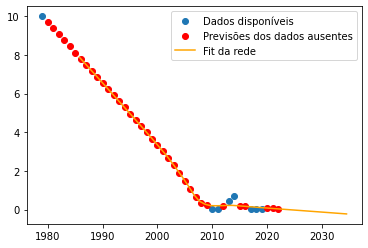

In [21]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*pesca_std + pesca_mean
prev_ausentes = model.predict(anos_para_prever_norm)*pesca_std + pesca_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pesca_std + pesca_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

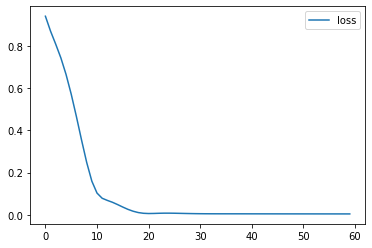

In [22]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [23]:
#Planilha com os dados preenchidos

df_previsoes = pd.DataFrame({'Ano':anos_para_prever, 'Sargo_beico_ind':prev_ausentes.flatten()})

df_preenchido = pd.concat((dados,df_previsoes)).sort_values('Ano')

df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Haemulidae/Sargo_beico/Interpolações Sargo_beico_ind.xlsx')

df_preenchido

,Ano,Sargo_beico_ind
29,1979,10.000000
0,1980,9.687347
1,1981,9.374722
2,1982,9.062101
3,1983,8.749479
4,1984,8.436771
5,1985,8.123341
6,1986,7.809286
7,1987,7.495245
8,1988,7.180782
